<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/LAWPP_Paper_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
import time
import numpy as np

# Data

## Data Mining

In [2]:
url_1 = "https://drive.google.com/drive/folders/1e-8MaG3WjO252RyztEES0HE-im8o7ULR"
url_2 = "https://drive.google.com/drive/u/1/folders/1Ksdl8uss6EYV1Ezxp7xOEGpybK5HHbTN"

Colocar todos os gdowns cujas as pastas de saída sejam as pastas que deveremos utilizar

In [37]:
start_time = time.time()

!gdown --folder "https://drive.google.com/drive/u/1/folders/1e3I2daEFfOgOsDaFU4hiON-OjsjyOjul" --output "./data"

print(time.time()-start_time)

Retrieving folder contents
Processing file 1IM0UyMjPolYR6EW8mnW7qz9uU-fYgbl4 U_0.npy
Processing file 1rh8JkB7n_Px0T8G4LebmfQIVpqnPWJkI U_1250.npy
Processing file 1Id_TCOc8ebgVwp3M5wz4fKxPhojotIMT U_2500.npy
Processing file 1yBZpgFi5zYX5hgjMyaly9jq-3YsVVXZs U_3750.npy
Processing file 1XELlZJADD8-k6rqJ_tC-QG-EauR1knT1 U_5000.npy
Processing file 1DtJGgP_KLdyZmAhZJzfo6KqmY0yY1y8P U_6250.npy
Processing file 1UoZCbCL9aPHYUNiJBVwokeFhKnOOysGA U_7500.npy
Processing file 1UUrLv5odw1uYfyLw03bIonRyV-zP2sfe U_8750.npy
Processing file 10rql2bINPxQ2F0uU5Y557s-fMhqlMEXt U_10000.npy
Processing file 1KIgDyb1d7wU_zhlG-iJl2mD80SBoLo17 U_11250.npy
Processing file 1U5f-KcoxvnnzFqncQsCZphS4SLAIShDR U_12500.npy
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1IM0UyMjPolYR6EW8mnW7qz9uU-fYgbl4
To: /content/data/U_0.npy
100% 50.3M/50.3M [00:00<00:00, 62.0MB/s]
Downloading...
From: https://drive.google.co

## Load Data

In [58]:
import os
import numpy as np

folder = "/content/data"
npy_files = [f for f in os.listdir(folder) if f.endswith('.npy')]

data_dict = {}
for file_name in npy_files:
    data_dict[file_name] = np.load(os.path.join(folder, file_name))

# Agora data_dict[file_name] tem o array carregado correspondente


In [52]:
path = "/content/data/"
file_name = "U_12500.npy"
data = np.load(f"{path}{file_name}")

In [61]:
data = data_dict[npy_files[0]]

## Transform Data

In [62]:
import numpy as np

# Supondo que data seja seu array numpy com shape (3, 128, 128, 128)
amplitude = np.sqrt(np.sum(data**2, axis=0))  # Soma ao longo do eixo das componentes (x,y,z)

print(amplitude.shape)  # Deve ser (128, 128, 128)


(128, 128, 128)


## Data Vizualization

In [63]:
import matplotlib.pyplot as plt
framesX = []
framesY = []
framesZ = []
# Pega o slice central no eixo z
for x in range(128):
  frameX = amplitude[x, :, :]
  framesX.append(frameX)
  frameY = amplitude[:, x, :]
  framesY.append(frameY)
  frameZ = amplitude[:, :, x]
  framesZ.append(frameZ)

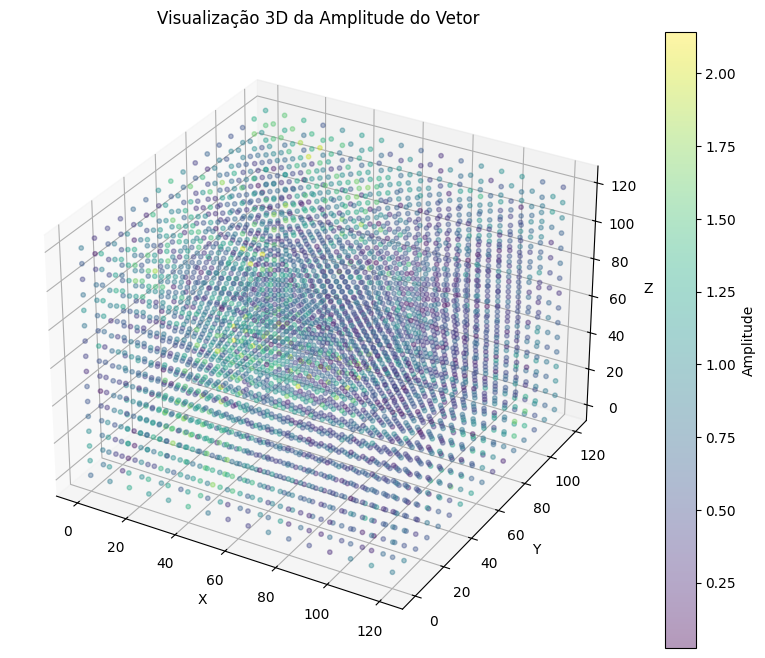

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # só precisa importar para ativar 3d

# Supondo que amplitude.shape == (128, 128, 128)
# Para reduzir o número de pontos, vamos pegar uma amostra, por exemplo, pegando cada 8 pontos no cubo
step = 8

x = np.arange(0, amplitude.shape[0], step)
y = np.arange(0, amplitude.shape[1], step)
z = np.arange(0, amplitude.shape[2], step)

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Valores correspondentes da amplitude nessa grade reduzida
values = amplitude[X, Y, Z]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D: coordenadas + cor e tamanho proporcional à amplitude
scat = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(),
                  c=values.flatten(), cmap='viridis',
                  s=10,#values.flatten()*10,  # escala o tamanho para visualização
                  alpha=0.4)

fig.colorbar(scat, ax=ax, label='Amplitude')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualização 3D da Amplitude do Vetor')

plt.show()


In [65]:
import numpy as np
import plotly.graph_objs as go

# Amostra para não sobrecarregar o gráfico (mesma amostragem que antes)
step = 8
x = np.arange(0, amplitude.shape[0], step)
y = np.arange(0, amplitude.shape[1], step)
z = np.arange(0, amplitude.shape[2], step)

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
values = amplitude[X, Y, Z]

trace = go.Scatter3d(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=values.flatten(),   # Cor pela amplitude
        colorscale='Viridis',
        colorbar=dict(title='Amplitude'),
        opacity=0.8
    )
)

layout = go.Layout(
    title='Visualização Interativa 3D da Amplitude do Vetor',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    )
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


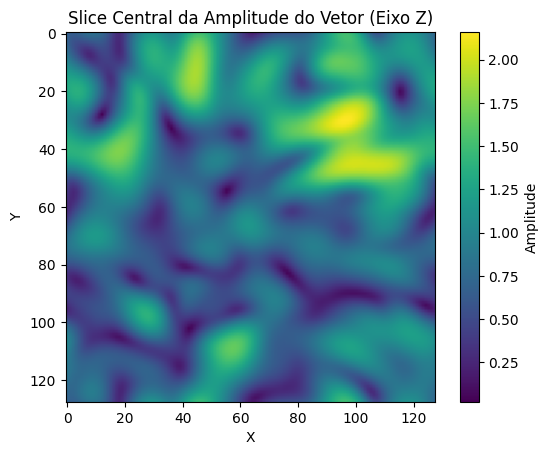

In [66]:
plt.imshow(framesZ[1], cmap='viridis')  # Você pode mudar o cmap se quiser
plt.colorbar(label='Amplitude')
plt.title('Slice Central da Amplitude do Vetor (Eixo Z)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()